In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import torch
# import botorch
# import pyro   
import matplotlib.pyplot as plt
import os
import torch.optim as optim

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device) #GPU?

def save_checkpoint(state, filename="checkpoint.pth"):
    """
    Save the training model at the checkpoint.
    """
    torch.save(state, filename)

def load_checkpoint(filename="checkpoint.pth"):
    """
    Load the checkpoint if it exists.
    """
    if os.path.isfile(filename):
        return torch.load(filename)
    return None

def delete_checkpoint(filename="checkpoint.pth"):
    """
    Delete the checkpoint file if it exists, with user confirmation.
    """
    if os.path.isfile(filename):
        user_input = input(f"Are you sure you want to delete '{filename}'? (yes/no): ").lower()
        if user_input == 'yes':
            os.remove(filename)
            print(f"Checkpoint '{filename}' has been deleted.")
        else:
            print("Deletion canceled.")
    else:
        print(f"No checkpoint file found at '{filename}' to delete.")



from torch.utils.data import ConcatDataset, Subset, DataLoader
from random import sample
def adjust_dataset_size(dataset, desired_batch_size):
    # Calculate the current size of the dataset
    dataset_size = len(dataset)
    # Calculate the remainder when dividing the dataset size by the desired batch size squared
    remainder = dataset_size % (desired_batch_size ** 2)

    # If the remainder is not zero, adjust the dataset size to make it divisible by the desired batch size squared
    if remainder != 0:
        # Calculate the number of samples to adjust the dataset size
        samples_to_adjust = (desired_batch_size ** 2) - remainder

        # If more samples are needed, augment the dataset by sampling from it
        if samples_to_adjust > 0:
            indices = np.random.choice(dataset_size, samples_to_adjust)
            additional_dataset = Subset(dataset, indices)

            # Combine the original dataset with the additional samples to create an adjusted dataset
            adjusted_dataset = ConcatDataset([dataset, additional_dataset])
            print("Adjusted dataset size: ", len(adjusted_dataset))
        
        # If fewer samples are needed, trim the dataset to the desired size
        else:
            adjusted_dataset_size = dataset_size - abs(samples_to_adjust)
            adjusted_dataset = Subset(dataset, list(range(adjusted_dataset_size)))
    else:
        # If the remainder is zero, the dataset size is already divisible by the desired batch size squared
        adjusted_dataset = dataset

    return adjusted_dataset




    
delete_checkpoint(filename="Generator.pth")
delete_checkpoint(filename="Discriminator.pth")

cuda
Deletion canceled.
Deletion canceled.


You can implement the pre-processing transformations, data sets, data loaders, etc. in this cell. 
**Important Note**: Read the "Grading Reference Pre-processing" bullet, and look at the test pre-processing transformations in the "Autograding and Final Tests" section before training models for long periods of time.
Directory does not exist.
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 3689081.72it/s]


Extracting ../MNIST\MNIST\raw\train-images-idx3-ubyte.gz to ../MNIST\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1030547.40it/s]


Extracting ../MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to ../MNIST\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 6881210.10it/s]


Extracting ../MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to ../MNIST\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4538001.14it/s]

Extracting ../MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../MNIST\MNIST\raw



Type of testset:  <class 'torchvision.datasets.mnist.MNIST'>
Type of testloader:  <class 'torch.utils.data.dataloader.DataLoader'>
Adjusted dataset size:  65610
Adjusted dataset size:  13122
Datasets adjusted 
Size of trainset: 65610
Size of trainloader: 65610
Size of testset: 13122
Size of testloader: 13122
Type of testset:  <class 'torch.utils.data.dataset.ConcatDataset'>
Type of testloader:  <class 'torch.utils.data.dataloader.DataLoader'>
Dataset Size:  65610
Expected number of batches: 810
Size of trainset: 65610
Size of trainloader: 810
Shape of inputs (batch): torch.Size([81, 1, 28, 28])
Shape of labels (batch): torch.Size([81])
Label:  5
tensor([[[-0.9922,  0.2078,  0.9843, -0.2941, -1.0000],
         [-1.0000,  0.0902,  0.9843,  0.4902, -0.9843],
         [-1.0000, -0.9137,  0.4902,  0.9843, -0.4510],
         [-1.0000, -1.0000, -0.7255,  0.8902,  0.7647],
         [-1.0000, -1.0000, -1.0000, -0.3647,  0.8824]]])
Label: 5


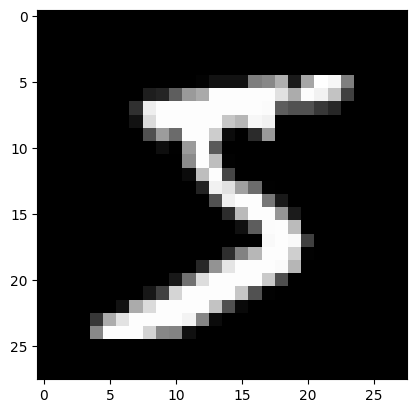

In [3]:
import torchvision.datasets
import torch.utils.data


import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.utils import save_image
import torchvision.transforms as transforms
import os

message = 'You can implement the pre-processing transformations, data sets, data loaders, etc. in this cell. \n'
message += '**Important Note**: Read the "Grading Reference Pre-processing" bullet, and look at the'
message += ' test pre-processing transformations in the "Autograding and Final Tests" section before'
message += ' training models for long periods of time.'
print(message)
#Obtained from
classes = [str(i) for i in range(10)]  # List of class names from 0 to 9

batch_size = 100

# Hyper-parameters

batch_size = 81

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5,))])

# Directory path for the dataset
directory_path = '../MNIST'


if os.path.exists(directory_path):
    print("Directory exists.")
else:
    print("Directory does not exist.")

sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)


trainset = torchvision.datasets.MNIST(root=directory_path, download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=3,pin_memory=True) #4 * 1 GPU

testset = torchvision.datasets.MNIST(root=directory_path, download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=3,pin_memory=True)
print('Type of testset: ', type(testset))
print('Type of testloader: ', type(testloader))
# Adjust the dataset size to make it divisible by the desired batch size
trainset = adjust_dataset_size(trainset, batch_size)
testset = adjust_dataset_size(testset, batch_size)
print("Datasets adjusted ")
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4,pin_memory=True) #4 * 1 GPU
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=4,pin_memory=True)


# Print the size of each dataset and loader
print("Size of trainset:", len(trainset))
print("Size of trainloader:", len(trainloader.dataset))
print("Size of testset:", len(testset))
print("Size of testloader:", len(testloader.dataset))
print('Type of testset: ', type(testset))
print('Type of testloader: ', type(testloader))

dataset_size = len(trainset)

expected_num_batches = dataset_size // batch_size
print("Dataset Size: ", dataset_size)
print("Expected number of batches:", expected_num_batches)

# Inspect the trainloader
print("Size of trainset:", len(trainset))
print("Size of trainloader:", len(trainloader))

# Extract a single batch from the DataLoader
inputs, labels = next(iter(trainloader))
inputs, labels = inputs.to(device), labels.to(device)

# Print shapes directly using PyTorch without converting to NumPy
print("Shape of inputs (batch):", inputs.shape)  # [batch_size, channels, height, width]
print("Shape of labels (batch):", labels.shape)  # [batch_size]

def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

img, label = trainset[0]
print('Label: ', label)
print(img[:,10:15,10:15])
torch.min(img), torch.max(img)

img_norm = denorm(img)
plt.imshow(img_norm[0], cmap='gray')
print('Label:', label)

# Visualize

You can visualize some of the pre-processed images here (This is optional and only for your own reference).


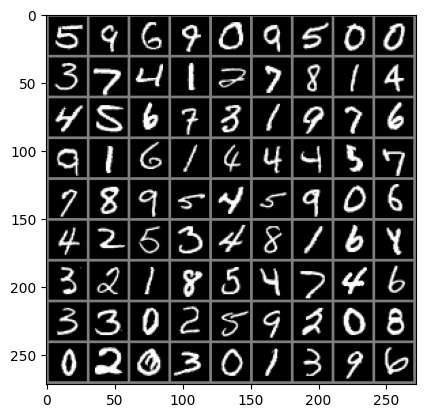

5     9     6     9     0     9     5     0     0     3     7     4     1     2     7     8     1     4     4     5     6     7     3     1     9     7     6     9     1     6     1     4     4     4     5     7     7     8     9     5     4     5     9     0     6     4     2     5     3     4     8     1     6     4     3     2     1     8     5     4     7     4     6     3     3     0     2     5     9     2     0     8     0     2     0     3     0     1     3     9     6    


In [4]:
message = 'You can visualize some of the pre-processed images here (This is optional and only for your own reference).'
print(message)

# your code here
# raise NotImplementedError

# # Source: Tutorial at https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images[:81], nrow=9))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))



# Generator

784
cuda
cuda


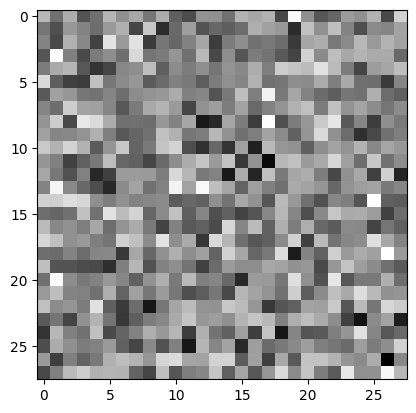

In [5]:
image_size = inputs.shape[3]*inputs.shape[2]
# image_size = 784
print(image_size)
hidden_size = 256
latent_size = 64

class Generator(nn.Module):

    def __init__(self):
        super(Generator, self).__init__()

        self.net = nn.Sequential(
                            nn.Linear(latent_size, hidden_size),
                            nn.ReLU(),
                            nn.Linear(hidden_size, hidden_size),
                            nn.ReLU(),
                            nn.Linear(hidden_size, image_size),
                            nn.Tanh())

    def forward(self, x):

        return self.net(x)
    
class Discriminator(nn.Module):

    def __init__(self):
        super(Discriminator, self).__init__()

        self.net = nn.Sequential(
                            nn.Linear(image_size, hidden_size),
                            nn.LeakyReLU(0.2),
                            nn.Linear(hidden_size, hidden_size),
                            nn.LeakyReLU(0.2),
                            nn.Linear(hidden_size, 1),
                            nn.Sigmoid())

    def forward(self, x):
        
        return self.net(x)

Gen = Generator()
Disc= Discriminator()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device) #GPU?

Gen = Generator().to(device)
Disc = Discriminator().to(device)
print(device)

y = Gen(torch.randn(2, latent_size,device='cuda'))
y
gen_imgs = denorm(y.reshape((-1, 28,28)).detach())
plt.imshow(gen_imgs[0].cpu(), cmap='gray');

Optimizer and Loss Function

In [6]:
criterion = nn.BCELoss()
lr_d=0.0002
lr_g=0.0002

d_optimizer = torch.optim.Adam(Disc.parameters(), lr=lr_d)
g_optimizer = torch.optim.Adam(Gen.parameters(), lr=lr_g)

def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

def train_discriminator(images):
    # Create the labels which are later used as input for the BCE loss
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)
        
    # Loss for real images
    outputs = Disc(images)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Loss for fake images
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = Gen(z)
    outputs = Disc(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Combine losses
    d_loss = d_loss_real + d_loss_fake
    # Reset gradients
    reset_grad()
    # Compute gradients
    d_loss.backward()
    # Adjust the parameters using backprop
    d_optimizer.step()
    
    return d_loss, real_score, fake_score, fake_images

def train_generator():
    # Generate fake images and calculate loss
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = Gen(z)
    labels = torch.ones(batch_size, 1).to(device)
    g_loss = criterion(Disc(fake_images), labels)

    # Backprop and optimize
    reset_grad()
    g_loss.backward()
    g_optimizer.step()
    return g_loss

from PIL import Image
from io import BytesIO

def concatenate_figures_horizontally(figures, output_file_name):
    # Specify the directory to save plots
    output_directory = './plots'
    # Create the directory if it does not exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    # Full path for the output file
    output_path = os.path.join(output_directory, output_file_name)

    images = []
    for fig in figures:
        # Save the figure to a bytes buffer
        buf = BytesIO()
        fig.savefig(buf, format='png', bbox_inches='tight')  # Use bbox_inches='tight' to reduce excess whitespace
        buf.seek(0)
        # Load the image into PIL and make a copy
        img = Image.open(buf).copy()  # Make a copy of the image data
        images.append(img)
        buf.close()  # Now you can safely close the buffer

    # Calculate total width and max height
    total_width = sum(img.width for img in images)
    max_height = max(img.height for img in images)

    # Create a new image with the appropriate size
    new_image = Image.new('RGB', (total_width, max_height))

    # Paste images into new image
    x_offset = 0
    for img in images:
        new_image.paste(img, (x_offset, 0))
        x_offset += img.width
        img.close()  # Close each image object to free memory

    # Save the new image
    # print(f'Saving graphs to {output_path}...')
    new_image.save(output_path)
    new_image.close()  # Close the final concatenated image

def plot_training_progress(real_images, fake_images, d_losses, g_losses, real_scores, fake_scores, lr_d,lr_g,epoch,epochChunk):
    figures=[]
    # Plot real and fake images side by side
    fig0 = plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.title("Real Images")
    plt.imshow(real_images[0].detach().cpu().numpy().reshape(28,28), cmap='gray')
    plt.subplot(1, 2, 2)
    plt.axis("off")
    plt.title("Fake Images")
    plt.imshow(fake_images[0].detach().cpu().numpy().reshape(28,28), cmap='gray')


    # Plot d_losses and g_losses
    fig1 = plt.figure(figsize=(10,5))
    plt.plot(d_losses, label='Discriminator Loss', linewidth=4)
    plt.plot(g_losses, label='Generator Loss', linewidth=4)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Discriminator and Generator Losses')

    figures.append(fig1)

    # Plot real_scores and fake_scores
    fig2= plt.figure(figsize=(10,5))
    plt.plot(real_scores, label='Real Score', linewidth=3.5)
    plt.plot(fake_scores, label='Fake Score', linewidth=4)
    plt.xlabel('Iterations')
    plt.ylabel('Score')
    plt.legend()
    plt.title('Real and Fake Scores')

    figures.append(fig2)

    # Plot learning_rates
    fig3 = plt.figure(figsize=(10,5))
    plt.plot(lr_d, label='Discriminator Learning Rate', linewidth=4)
    plt.plot(lr_g, label='Generator Learning Rate', linewidth=4)
    plt.xlabel('Iterations')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate')
    if epoch % epochChunk == 0:
        plt.show()
    figures.append(fig3)
    output_path = 'Graphs-{0:0=4d}.png'.format(epoch)
    concatenate_figures_horizontally(figures, output_path)

    # Optionally show figures if needed
    figures[:0] = [fig0]
    if epoch % epochChunk == 0:
        for fig in figures:
            plt.figure(fig.number)  # Switch to figure
            plt.show()
    for fig in figures:
        plt.close(fig)  # Ensure figures are closed properly

sample_vectors = torch.randn(batch_size, latent_size).to(device)
def save_fake_images(index):
    fake_images = Gen(sample_vectors)
    # Assuming fake_images is a batch of flattened grayscale images with shape [batch_size, 784]
    fake_images = fake_images.view(-1, 1, 28, 28)  # Reshape to [batch_size, 1, 28, 28]
    # print("Reshaped fake_images:", fake_images.shape)
    
    # Resize the fake images to be twice as large with bicubic interpolation
    fake_images = F.interpolate(fake_images, size=(112,112), mode='bicubic')
    fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
    # print('Saving', fake_fname)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=9, format='png')

# Training

In [7]:
import time
# Load checkpoint if it exists
checkpoint1 = load_checkpoint("Generator.pth")

if checkpoint1:
    print('Generator.pth Loaded')
    Gen.load_state_dict(checkpoint1['model_state_dict'])
    g_optimizer.load_state_dict(checkpoint1['optimizer_state_dict'])  # Load optimizer for generator
    start_epoch = checkpoint1['epoch']
    d_losses = checkpoint1['d_losses']
    g_losses = checkpoint1['g_losses']
    real_scores = checkpoint1['real_scores']
    fake_scores = checkpoint1['fake_scores']
    lr_d_scores = checkpoint1['lr_d_scores']
    lr_g_scores = checkpoint1['lr_g_scores']
else:
    start_epoch = 1
    d_losses, g_losses, real_scores, fake_scores, lr_g_scores, lr_d_scores = [], [], [], [], [], []
    del checkpoint1


checkpoint2 = load_checkpoint("Discriminator.pth")
if checkpoint2:
    print('Discriminator.pth Loaded')
    Disc.load_state_dict(checkpoint2['model_state_dict'])
    d_optimizer.load_state_dict(checkpoint2['optimizer_state_dict'])  # Load optimizer for generator
    start_epoch = checkpoint2['epoch']
    d_losses = checkpoint2['d_losses']
    g_losses = checkpoint2['g_losses']
    real_scores = checkpoint2['real_scores']
    fake_scores = checkpoint2['fake_scores']
    lr_d_scores = checkpoint2['lr_d_scores']
    lr_g_scores = checkpoint2['lr_g_scores']
else:
    start_epoch = 1
    d_losses, g_losses, real_scores, fake_scores, lr_g_scores, lr_d_scores = [], [], [], [], [], []
    del checkpoint2
num_epochs = 540
epochChunk = 40
total_step = len(trainloader)

print("Length of trainloader:", len(trainloader))
print("Length of trainset:", len(trainset))

for epoch in range(start_epoch,num_epochs):
    start_time = time.time()  # Start time of the epoch
    # batch_count = 0
    for i, (images, _) in enumerate(trainloader):
        # Load a batch & transform to vectors
        # batch_count += 1
        # print("Batch:", batch_count)
        # print("Batch size:", images.shape)
        # images = images.reshape(batch_size, -1)
        # print(i)
        # print(images.shape)
        images = images.reshape(batch_size, -1).to(device)
        
        # Train the discriminator and generator
        d_loss, real_score, fake_score,fake_images = train_discriminator(images)
        g_loss = train_generator()
        
        # Inspect the losses
        if (i+1) % 500 == 0:
           
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
    d_losses.append(d_loss.item())
    g_losses.append(g_loss.item())
    real_scores.append(real_score.mean().item())
    fake_scores.append(fake_score.mean().item())
    lr_g_scores.append(lr_g)
    lr_d_scores.append(lr_d)

    d_lossAvg = d_loss / len(trainloader.dataset)
    g_lossAvg = g_loss / len(trainloader.dataset)
    fake_scoreAvg = fake_score / len(trainloader.dataset)
    real_scoreAvg = real_score / len(trainloader.dataset)
    
    plot_training_progress(images, fake_images, d_losses, g_losses, real_scores, fake_scores, lr_g_scores,lr_d_scores,epoch,epochChunk)

    # Calculate duration and print
    epoch_duration = time.time() - start_time
    print(f"Epoch {epoch} completed in {epoch_duration:.2f} seconds")

    save_checkpoint({
    'epoch': epoch + 1,
    'model_state_dict': Disc.state_dict(),
    'optimizer_state_dict': d_optimizer.state_dict(),
    'd_losses': d_losses,
    'g_losses': g_losses,
    'real_scores': real_scores,
    'fake_scores': fake_scores,
    'lr_d_scores': lr_d_scores,
    'lr_g_scores': lr_g_scores
}, "Discriminator.pth")
    save_checkpoint({
    'epoch': epoch + 1,
    'model_state_dict': Gen.state_dict(),
    'optimizer_state_dict': g_optimizer.state_dict(),
    'd_losses': d_losses,
    'g_losses': g_losses,
    'real_scores': real_scores,
    'fake_scores': fake_scores,
    'lr_d_scores': lr_d_scores,
    'lr_g_scores': lr_g_scores
}, "Generator.pth")
    save_fake_images(epoch)

Generator.pth Loaded
Discriminator.pth Loaded
Length of trainloader: 810
Length of trainset: 65610


In [8]:
# # Load the checkpoint file
# checkpoint = torch.load("Generator.pth")
# print(epoch)
# # Print keys and values in the checkpoint dictionary
# for key, value in checkpoint.items():
#     print(key, ": ", value)

import cv2
def concatenate_images_vertically(fake_img_path, graph_img_path, output_dir):
    # Load the fake image and graph image
    fake_image = Image.open(fake_img_path)
    graph_image = Image.open(graph_img_path)

    # Resize graph image to match the width of the fake image
    width_fake_image = fake_image.width
    aspect_ratio = graph_image.height / graph_image.width
    new_height = int(width_fake_image * aspect_ratio)
    graph_image_resized = graph_image.resize((width_fake_image, new_height), Image.ANTIALIAS)

    # Concatenate images vertically
    total_height = fake_image.height + graph_image_resized.height
    new_image = Image.new('RGB', (width_fake_image, total_height))
    new_image.paste(fake_image, (0, 0))
    new_image.paste(graph_image_resized, (0, fake_image.height))

    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Construct the output path and save the concatenated image
    base_filename = os.path.basename(fake_img_path)
    output_path = os.path.join(output_dir, base_filename.replace('fake_images', 'image_plot_combined'))
    new_image.save(output_path)
    return output_path

def create_video(image_folder, output_video_file, output_dir):
    # Ensure output directory for the video exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created directory {output_dir} for output video.")

    output_video_path = os.path.join(output_dir, output_video_file)

    # Check if the image directory exists and is not empty
    if not os.path.exists(image_folder) or not os.listdir(image_folder):
        print(f"Directory {image_folder} does not exist or is empty.")
        return  # Exit the function if no files to process

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    files = [os.path.join(image_folder, f) for f in sorted(os.listdir(image_folder)) if 'image_plot_combined' in f]

    if not files:
        print("No files found in the directory.")
        return  # Exit if no files found

    frame = cv2.imread(files[0])
    if frame is None:
        print(f"Could not read the first file: {files[0]}")
        return  # Check if the first file can be read properly

    height, width, layers = frame.shape
    out = cv2.VideoWriter(output_video_path, fourcc, 8, (width, height))

    for file in files:
        frame = cv2.imread(file)
        if frame is not None:
            out.write(frame)  # Write out frame to video
        else:
            print(f"Skipping file, cannot read: {file}")

    out.release()
    print(f"Video created successfully: {output_video_path}")


In [9]:
# import cv2
# import os
# from IPython.display import FileLink

# vid_fname = 'MNIST_GAN_Training.avi'

# files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'fake_images' in f]
# files.sort()

# out = cv2.VideoWriter(vid_fname,cv2.VideoWriter_fourcc(*'MP4V'), 8, (302,302))
# [out.write(cv2.imread(fname)) for fname in files]
# out.release()
# FileLink('gans_training.avi')

from IPython.display import FileLink

# Paths
sample_dir_fake = 'samples'  # Directory containing fake images
sample_dir_graphs = 'plots'  # Directory containing graph images
combined_images = 'img_plot_combined'
combined_images_dir = 'video'  # Directory for combined images

# Prepare file lists
fake_images = [f for f in sorted(os.listdir(sample_dir_fake)) if 'fake_images' in f]
graph_images = [f for f in sorted(os.listdir(sample_dir_graphs)) if 'Graphs' in f]
print(len(fake_images))

print(len(graph_images))
# Assume that fake_images and graph_images are aligned correctly
for fake_img, graph_img in zip(fake_images, graph_images):
    fake_img_path = os.path.join(sample_dir_fake, fake_img)
    graph_img_path = os.path.join(sample_dir_graphs, graph_img)
    concatenate_images_vertically(fake_img_path, graph_img_path,combined_images)

# Create video from combined images
vid_fname = 'MNIST_GAN_Training.avi'
create_video(combined_images, vid_fname,combined_images_dir)

# Optionally, provide a link to download the video (in Jupyter Notebook)
FileLink('video/' + vid_fname)

539
539


C:\Users\Jesse\AppData\Local\Temp\ipykernel_242388\4258484178.py:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  graph_image_resized = graph_image.resize((width_fake_image, new_height), Image.ANTIALIAS)


Video created successfully: video\MNIST_GAN_Training.avi


c:\Users\Jesse\Documents\GitHub\GAN-MNIST-PyTorch\video\MNIST_GAN_Training.avi

In [10]:
# Optionally, provide a link to download the video (in Jupyter Notebook)
FileLink('video/' + vid_fname)

c:\Users\Jesse\Documents\GitHub\GAN-MNIST-PyTorch\video\MNIST_GAN_Training.avi